In [1]:
import pandas as pd

In [2]:
# Read the dataset
data = pd.read_csv('all_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   IMDb ID                                       25312 non-null  object 
 1   Director                                      25312 non-null  object 
 2   Writer                                        25312 non-null  object 
 3   Cast                                          25312 non-null  object 
 4   Sound Mix                                     25312 non-null  object 
 5   Color                                         25312 non-null  object 
 6   Year                                          25312 non-null  float64
 7   Certificate                                   25312 non-null  object 
 8   Duration                                      25312 non-null  int64  
 9   Genre                                         25312 non-null 

In [4]:
data.isna().sum()

IMDb ID                                            0
Director                                           0
Writer                                             0
Cast                                               0
Sound Mix                                          0
Color                                              0
Year                                               0
Certificate                                        0
Duration                                           0
Genre                                              0
Release Date                                       0
Country of Origin                                  0
Languages                                          0
Production Companies                               0
Filming Locations                                  0
Critic Reviews                                     0
Metascore                                          0
Budget                                             0
Gross Worldwide                               

In [5]:
# These columns may not help the predict so drop first

data_dropped_unwanted_columns = data.drop(columns=['Sex & Nudity_Severity','Sex & Nudity_Number_of_votes','Sex & Nudity_Total_votes','Violence & Gore_Severity','Violence & Gore_Number_of_votes','Violence & Gore_Total_votes','Profanity_Severity','Profanity_Number_of_votes','Profanity_Total_votes','Alcohol, Drugs & Smoking_Severity','Alcohol, Drugs & Smoking_Number_of_votes','Alcohol, Drugs & Smoking_Total_votes','Frightening & Intense Scenes_Severity','Frightening & Intense Scenes_Number_of_votes','Frightening & Intense Scenes_Total_votes'])

In [6]:
data_dropped_unwanted_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IMDb ID               25312 non-null  object 
 1   Director              25312 non-null  object 
 2   Writer                25312 non-null  object 
 3   Cast                  25312 non-null  object 
 4   Sound Mix             25312 non-null  object 
 5   Color                 25312 non-null  object 
 6   Year                  25312 non-null  float64
 7   Certificate           25312 non-null  object 
 8   Duration              25312 non-null  int64  
 9   Genre                 25312 non-null  object 
 10  Release Date          25312 non-null  object 
 11  Country of Origin     25312 non-null  object 
 12  Languages             25312 non-null  object 
 13  Production Companies  25312 non-null  object 
 14  Filming Locations     25312 non-null  object 
 15  Critic Reviews     

In [7]:
data_dropped_unwanted_columns.isna().sum()

IMDb ID                 0
Director                0
Writer                  0
Cast                    0
Sound Mix               0
Color                   0
Year                    0
Certificate             0
Duration                0
Genre                   0
Release Date            0
Country of Origin       0
Languages               0
Production Companies    0
Filming Locations       0
Critic Reviews          0
Metascore               0
Budget                  0
Gross Worldwide         0
Rating                  0
Number of votes         0
Popularity              0
Popularity Delta        0
Place                   0
Profit Margin           0
dtype: int64

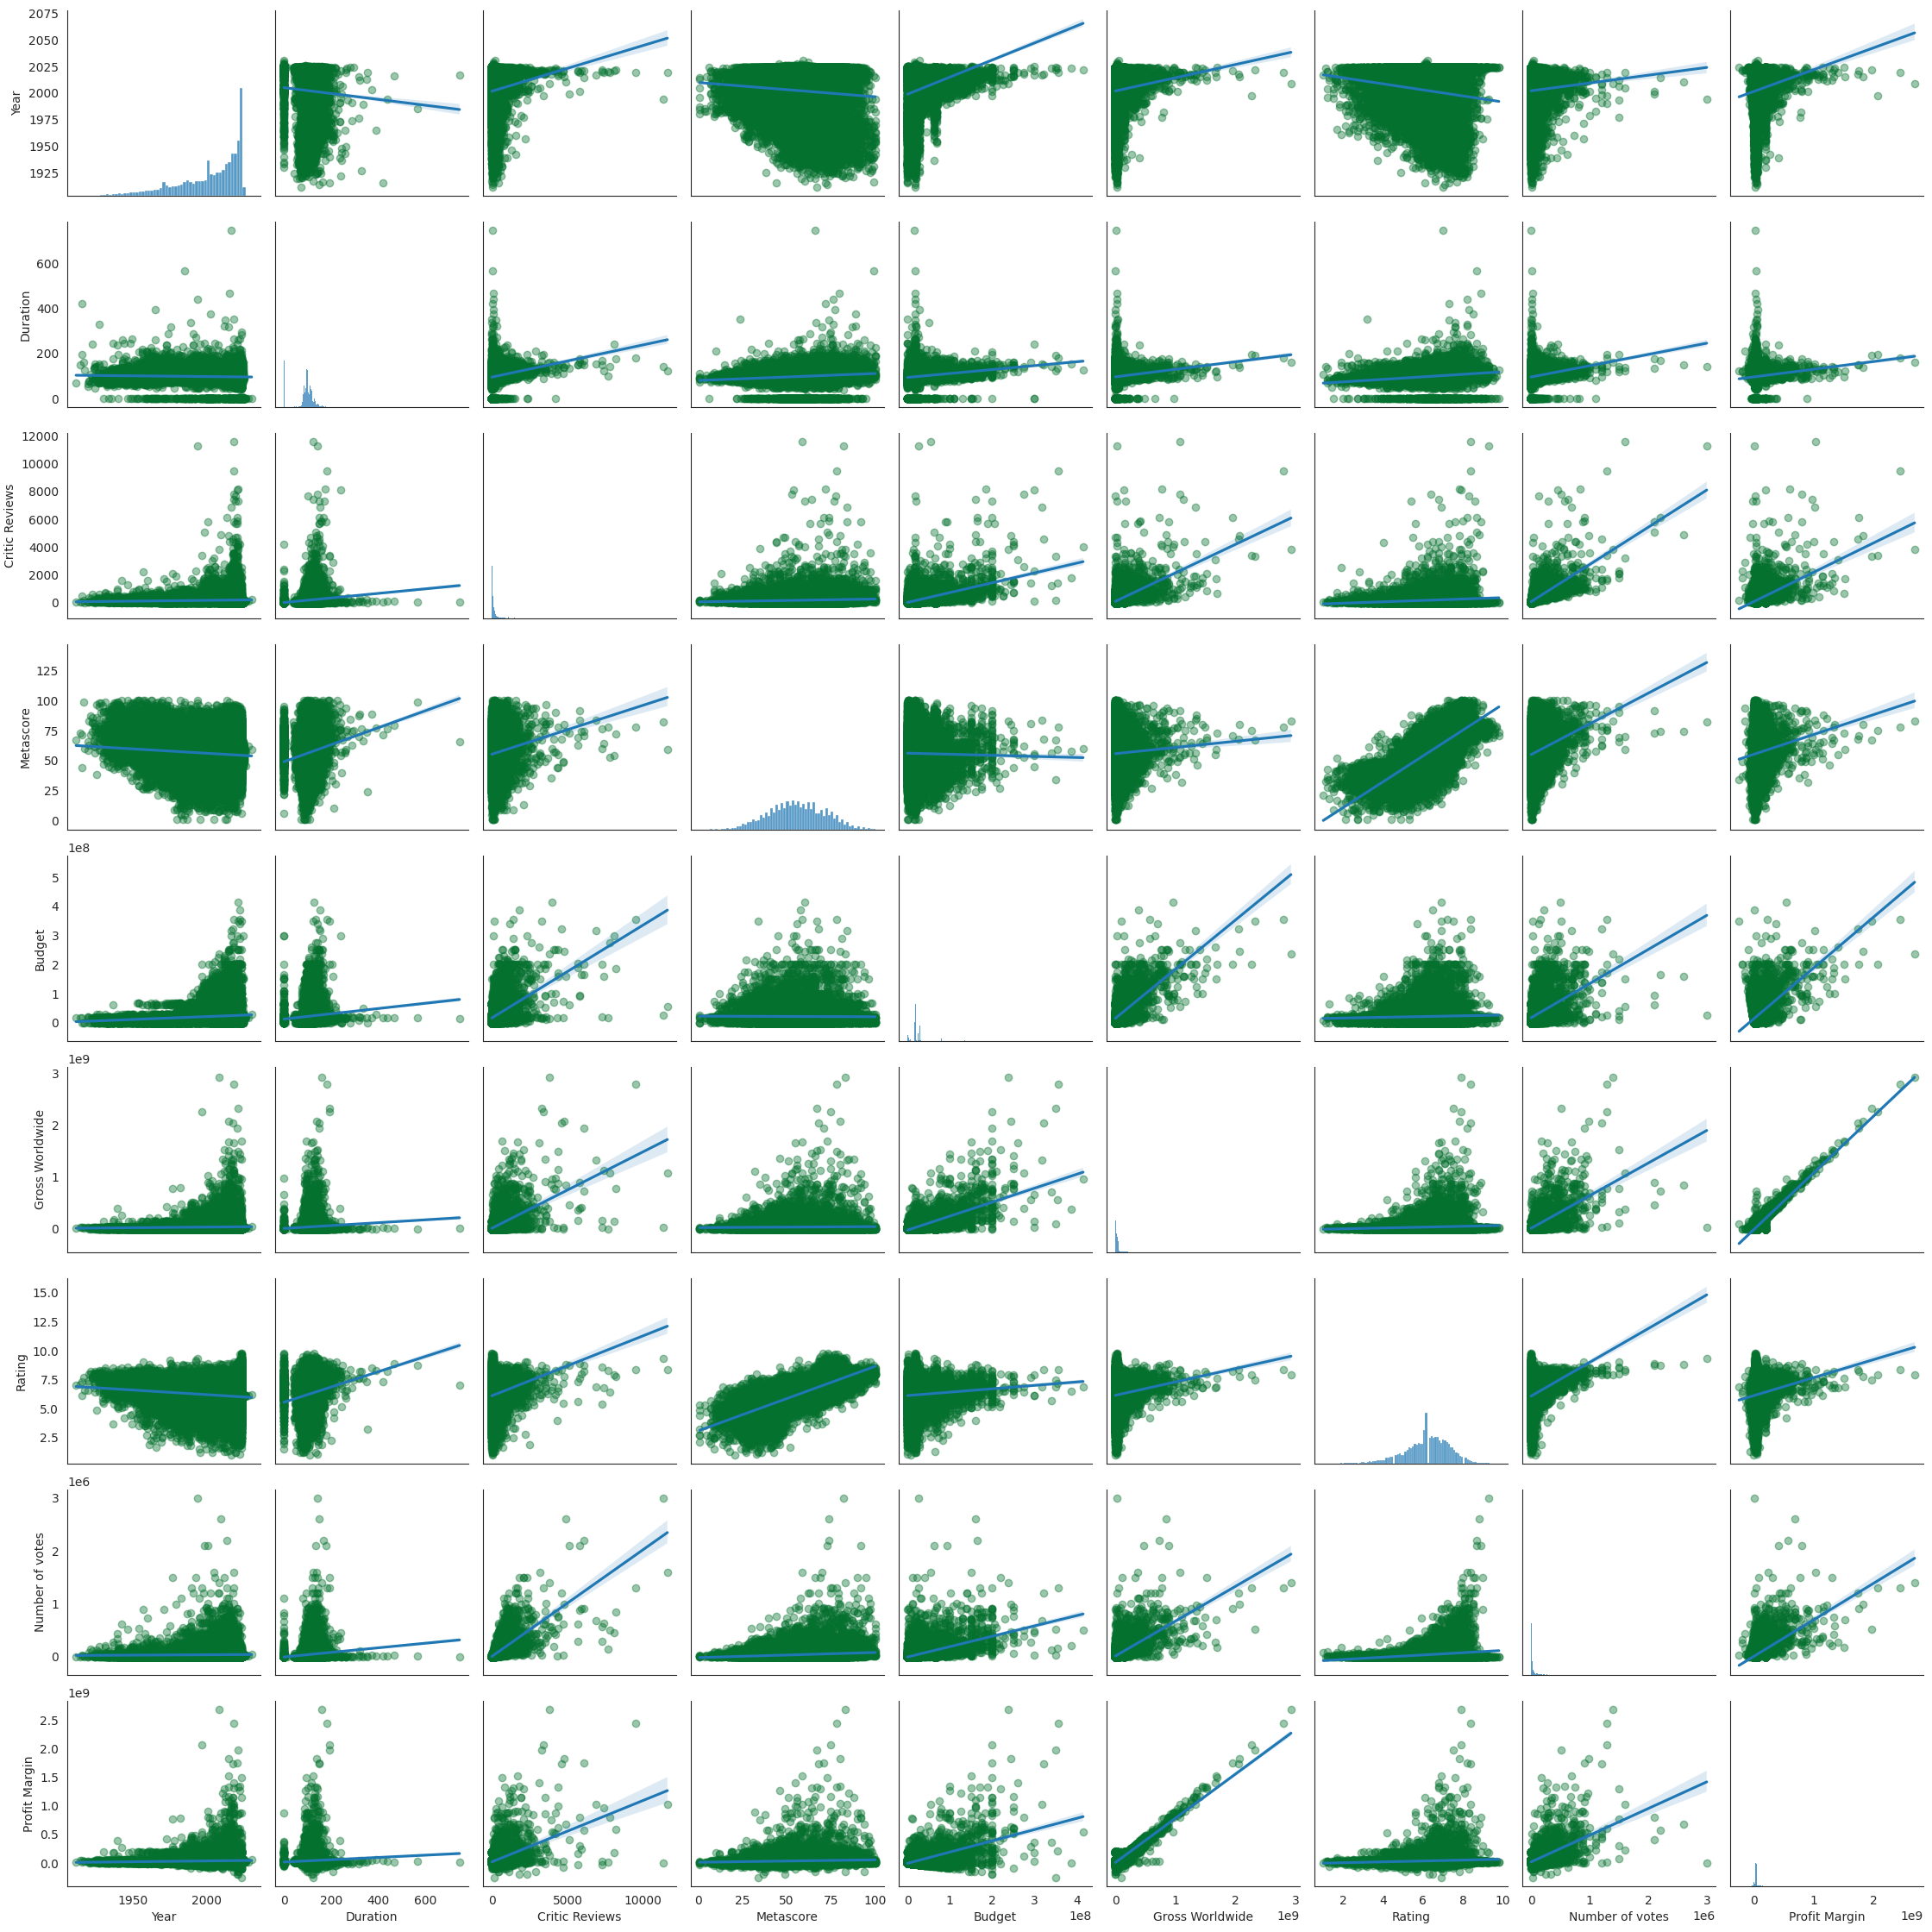

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features = data_dropped_unwanted_columns.columns
with sns.axes_style('white'):
    g=sns.pairplot(data_dropped_unwanted_columns[features], kind='reg',
                    plot_kws={'scatter_kws' :{'color': sns.color_palette('Greens')[-1], 'alpha': 0.4}})
plt.tight_layout()

In [9]:
# Drop category columns
exclude_columns = ['IMDb ID', 'Cast', 'Production Companies', 'Director', 'Writer']
data_drop_unneeded = data_dropped_unwanted_columns.drop(columns=exclude_columns)

In [10]:
# Get unique data of genre to process
data_drop_unneeded['Genre'].unique().sum()
column_data = data_drop_unneeded['Genre'].astype(str)

value_counts = column_data.str.split('|').explode().value_counts()

for genre, count in value_counts.items():
    print(f"{genre}: {count}")

filtered_genres = value_counts[value_counts >= 1230].index.tolist()

data_filtered = data_drop_unneeded[column_data.str.split('|').apply(lambda x: any(item in filtered_genres for item in x))]

Drama: 13974
Comedy: 7991
Thriller: 7439
Romance: 5208
Action: 4859
Horror: 4314
Crime: 4305
Adventure: 3207
Mystery: 3051
Sci-Fi: 2403
Fantasy: 2329
Family: 1772
Dark Comedy: 1404
Biography: 1334
History: 1065
War: 1033
Animation: 953
Music: 750
Documentary: 698
Musical: 665
Satire: 643
Period Drama: 640
Sport: 620
Western: 613
Slasher Horror: 559
Supernatural Horror: 542
Slapstick: 525
Psychological Thriller: 487
Romantic Comedy: 429
Tragedy: 428
Parody: 426
Psychological Drama: 364
Superhero: 344
Coming-of-Age: 335
True Crime: 333
Computer Animation: 320
Docudrama: 258
Buddy Comedy: 240
Animal Adventure: 239
Film Noir: 235
Anime: 221
Teen Horror: 201
Psychological Horror: 196
Martial Arts: 195
Space Sci-Fi: 192
Teen Comedy: 192
Body Horror: 191
One-Person Army Action: 186
Dark Fantasy: 182
Feel-Good Romance: 179
Teen Drama: 177
Supernatural Fantasy: 173
Farce: 171
Adult Animation: 171
Quest: 162
Monster Horror: 159
Dystopian Sci-Fi: 158
Epic: 154
Holiday: 153
Suspense Mystery: 152
E

In [11]:
def extract_last_part(value):
    if ',' in value:
        return value.split(',')[-1].strip()
    else:
        return value.strip()

# Process Filming Locations
data_drop_unneeded['Filming Locations'] = data_drop_unneeded['Filming Locations'].astype(str).apply(extract_last_part)

In [12]:
from sklearn.preprocessing import LabelEncoder
# Encoding some category data column
encode_object = LabelEncoder()
data_drop_unneeded_encoded = data_drop_unneeded.copy()
for col in ['Sound Mix', 'Color', 'Certificate', 'Genre', 'Country of Origin', 'Languages','Release Date','Place', 'Filming Locations']:
    data_drop_unneeded_encoded[col] = encode_object.fit_transform(data_drop_unneeded_encoded[col])

In [13]:
data_drop_unneeded_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sound Mix          25312 non-null  int32  
 1   Color              25312 non-null  int32  
 2   Year               25312 non-null  float64
 3   Certificate        25312 non-null  int32  
 4   Duration           25312 non-null  int64  
 5   Genre              25312 non-null  int32  
 6   Release Date       25312 non-null  int32  
 7   Country of Origin  25312 non-null  int32  
 8   Languages          25312 non-null  int32  
 9   Filming Locations  25312 non-null  int32  
 10  Critic Reviews     25312 non-null  float64
 11  Metascore          25312 non-null  float64
 12  Budget             25312 non-null  float64
 13  Gross Worldwide    25312 non-null  float64
 14  Rating             25312 non-null  float64
 15  Number of votes    25312 non-null  float64
 16  Popularity         253

In [14]:
# Process column
data_drop_unneeded_encoded['Popularity'] = data_drop_unneeded_encoded['Popularity'].str.replace(',', '').astype(int)
data_drop_unneeded_encoded['Popularity Delta'] = data_drop_unneeded_encoded['Popularity Delta'].str.replace(',', '').astype(int)

In [15]:
# Save data milestone
data_drop_unneeded_encoded.to_csv('data_drop_unneeded_encoded.csv')

In [16]:
data_drop_unneeded_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sound Mix          25312 non-null  int32  
 1   Color              25312 non-null  int32  
 2   Year               25312 non-null  float64
 3   Certificate        25312 non-null  int32  
 4   Duration           25312 non-null  int64  
 5   Genre              25312 non-null  int32  
 6   Release Date       25312 non-null  int32  
 7   Country of Origin  25312 non-null  int32  
 8   Languages          25312 non-null  int32  
 9   Filming Locations  25312 non-null  int32  
 10  Critic Reviews     25312 non-null  float64
 11  Metascore          25312 non-null  float64
 12  Budget             25312 non-null  float64
 13  Gross Worldwide    25312 non-null  float64
 14  Rating             25312 non-null  float64
 15  Number of votes    25312 non-null  float64
 16  Popularity         253

In [17]:
data_drop_unneeded_encoded.head()

,Sound Mix,Color,Year,Certificate,Duration,Genre,Release Date,Country of Origin,Languages,Filming Locations,Critic Reviews,Metascore,Budget,Gross Worldwide,Rating,Number of votes,Popularity,Popularity Delta,Place,Profit Margin
0,557,1,2024.0,3,141,1769,7455,1754,187,76,1200.0,78.0,17500000.0,54130377.0,7.5,142000.0,2,1,110,36630377.0
1,1067,1,1982.0,3,124,5034,978,2012,375,225,183.0,75.0,7500000.0,129795890.0,7.1,64000.0,3860,896,107,122295890.0
2,65,1,1984.0,1,124,7662,4446,1984,187,225,209.0,41.0,35000000.0,14296438.0,4.4,25000.0,4937,59,106,-20703562.0
3,1067,1,1978.0,1,114,320,2117,2012,187,225,129.0,41.0,5000000.0,85196485.0,6.3,31000.0,4883,323,107,80196485.0
4,266,1,2005.0,2,124,4204,639,1724,386,141,529.0,41.0,130000000.0,119240351.0,6.1,105000.0,4048,519,110,-10759649.0


In [18]:
categorical_features = ["Sound Mix", "Color", "Year", "Certificate", "Genre", "Release Date", "Country of Origin", "Languages", "Filming Locations", "Place"]

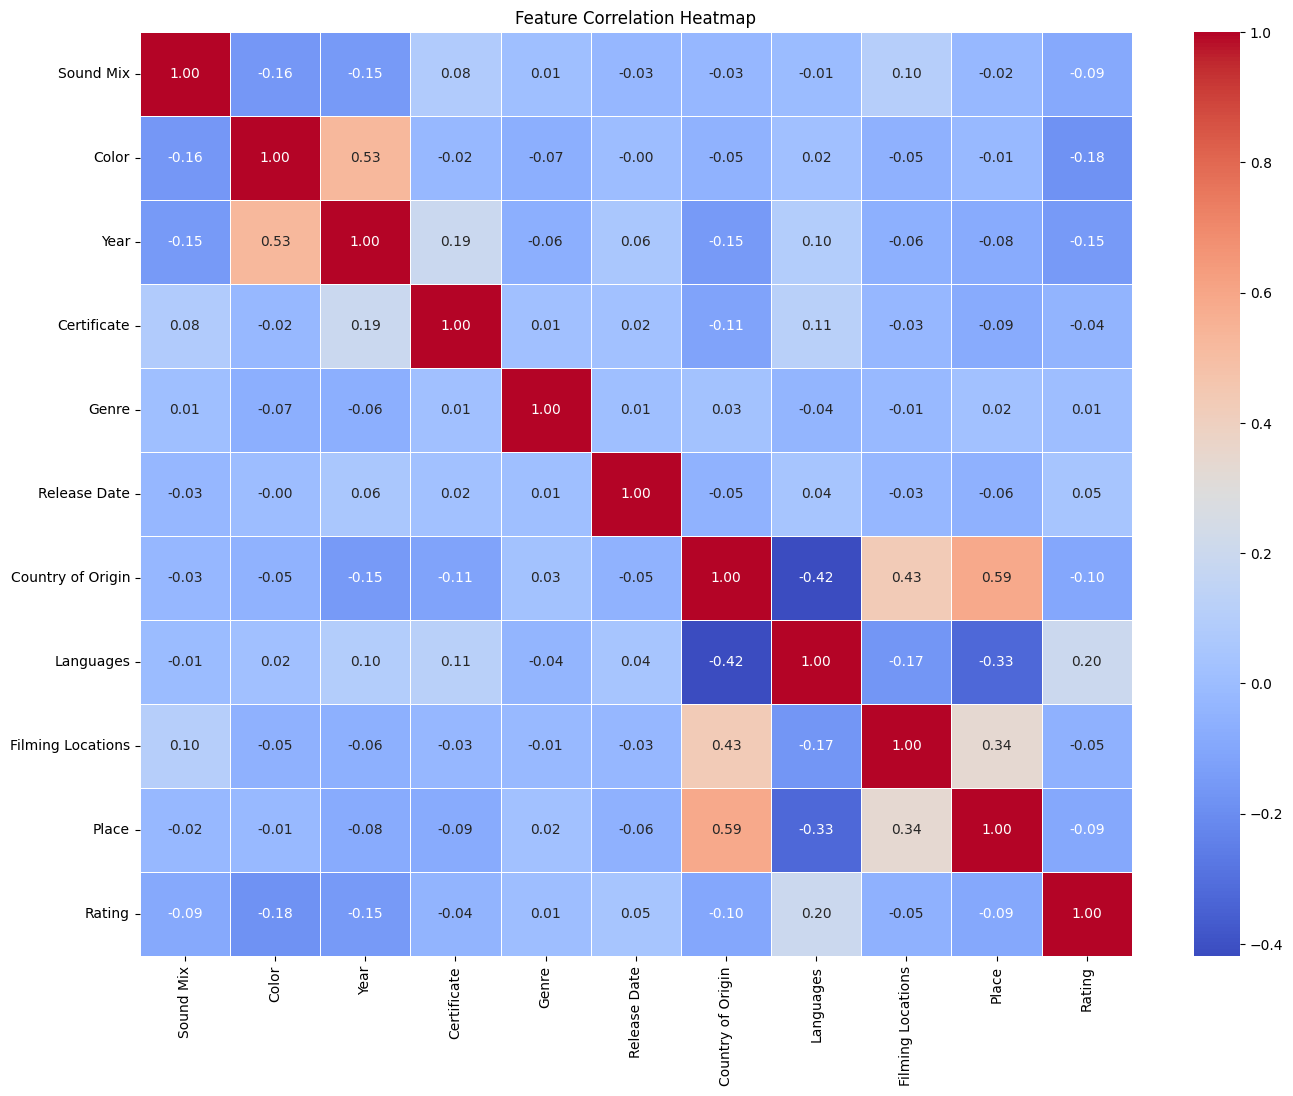

In [19]:
corr_matrix = data_drop_unneeded_encoded[[*categorical_features, "Rating"]].corr()

# Draw heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

def select_features_based_on_vif(X, categorical_features, threshold=5):
    vif_raw = X.copy()
    for feature in categorical_features:
        vif_raw.drop(feature,axis=1, inplace=True)
    while True:
        vif_df = calculate_vif(vif_raw)
        max_vif = vif_df['VIF'].max()
        if max_vif < threshold:
            break
        drop_feature = vif_df.loc[vif_df['VIF'].idxmax(), 'Feature']
        print(f"Dropping feature '{drop_feature}' with VIF = {max_vif}")
        X = X.drop(columns=[drop_feature])
        vif_raw = vif_raw.drop(columns=[drop_feature])
    return X, vif_df

In [21]:
# Choosing feature base on vif
data_selected, vif_list = select_features_based_on_vif(data_drop_unneeded_encoded.drop('Rating',axis=1), categorical_features,9)

Dropping feature 'Gross Worldwide' with VIF = 10.263118334687197


In [22]:
vif_list

,Feature,VIF
0,Duration,7.706699
1,Critic Reviews,2.767606
2,Metascore,7.577449
3,Budget,3.024202
4,Number of votes,2.879587
5,Popularity,3.460166
6,Popularity Delta,1.121173
7,Profit Margin,2.197326


In [23]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25312 entries, 0 to 25311
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sound Mix          25312 non-null  int32  
 1   Color              25312 non-null  int32  
 2   Year               25312 non-null  float64
 3   Certificate        25312 non-null  int32  
 4   Duration           25312 non-null  int64  
 5   Genre              25312 non-null  int32  
 6   Release Date       25312 non-null  int32  
 7   Country of Origin  25312 non-null  int32  
 8   Languages          25312 non-null  int32  
 9   Filming Locations  25312 non-null  int32  
 10  Critic Reviews     25312 non-null  float64
 11  Metascore          25312 non-null  float64
 12  Budget             25312 non-null  float64
 13  Number of votes    25312 non-null  float64
 14  Popularity         25312 non-null  int32  
 15  Popularity Delta   25312 non-null  int32  
 16  Place              253

In [24]:
data_without_drop_pop_delta_place = data_selected.copy()

In [25]:
# Drop Popularity Delta and Place which is not good for predicting
data_selected = data_selected.drop(columns=['Popularity Delta','Place'], axis=1)

In [26]:
data_selected.columns

Index(['Sound Mix', 'Color', 'Year', 'Certificate', 'Duration', 'Genre',
       'Release Date', 'Country of Origin', 'Languages', 'Filming Locations',
       'Critic Reviews', 'Metascore', 'Budget', 'Number of votes',
       'Popularity', 'Profit Margin'],
      dtype='object')

In [27]:
data_selected['Rating'] = data_drop_unneeded_encoded['Rating']

In [28]:
# Save data milestone
data_selected.to_csv('data_selected.csv', index=False)

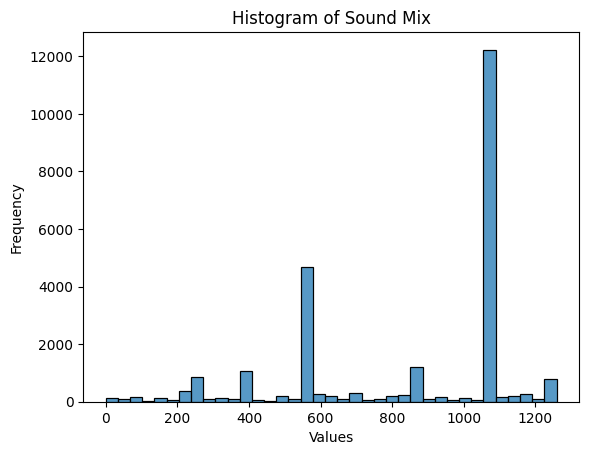

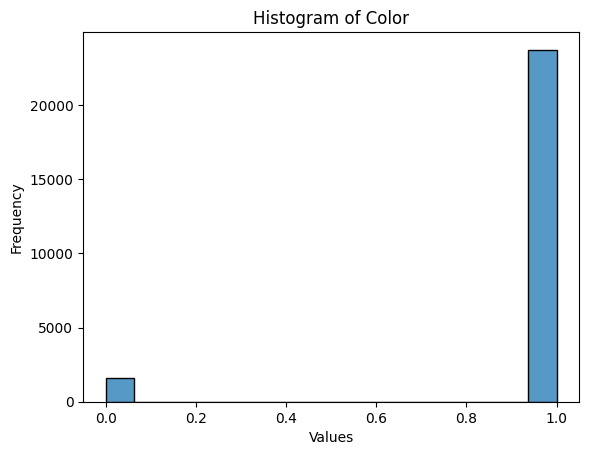

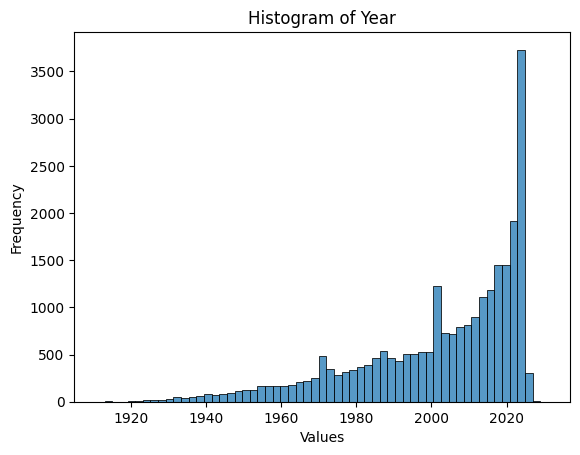

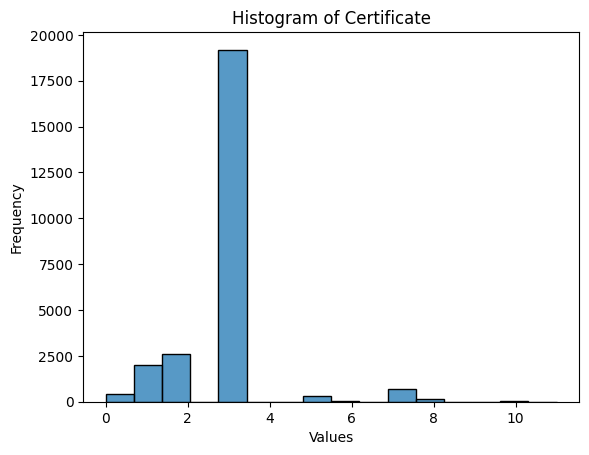

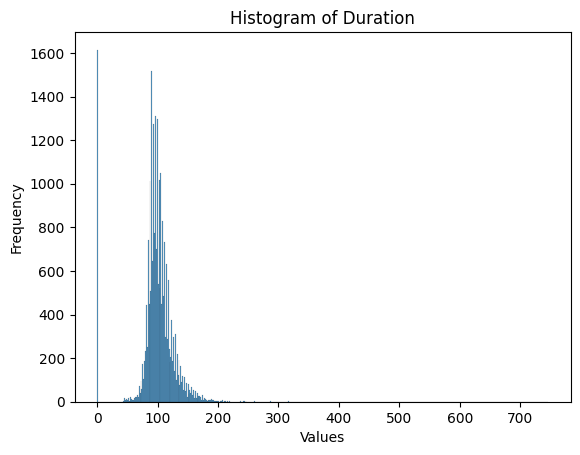

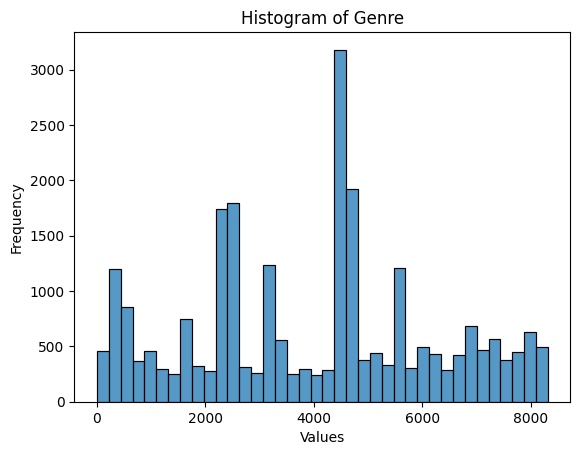

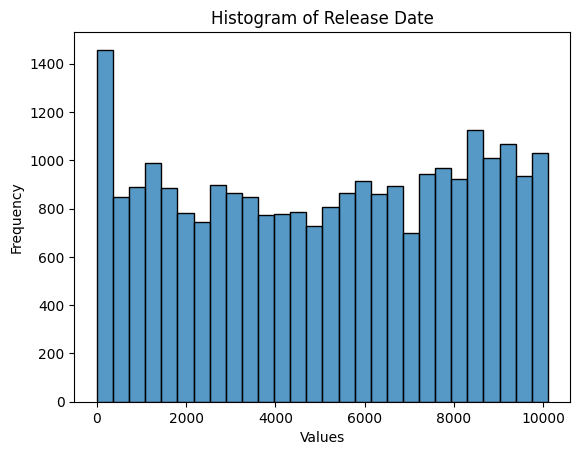

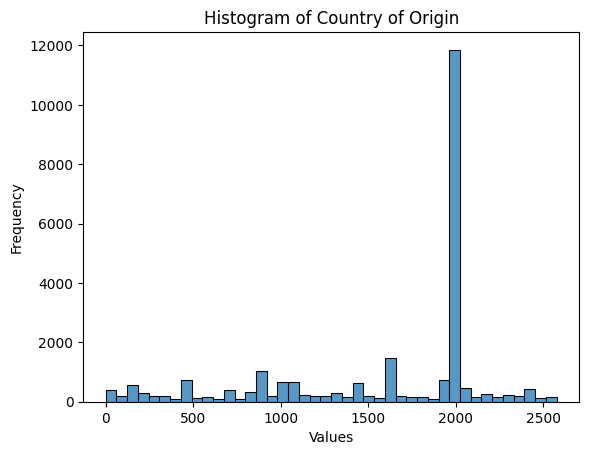

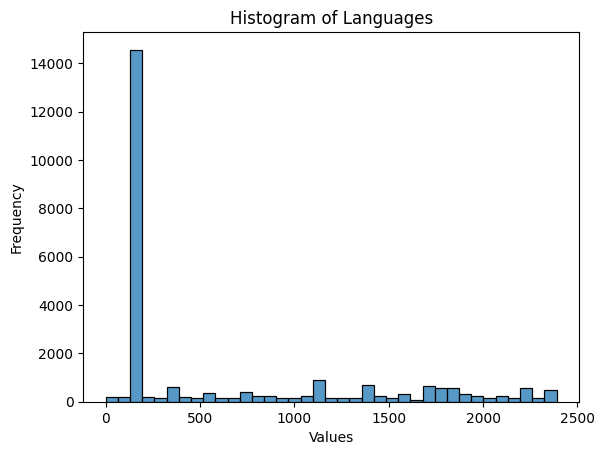

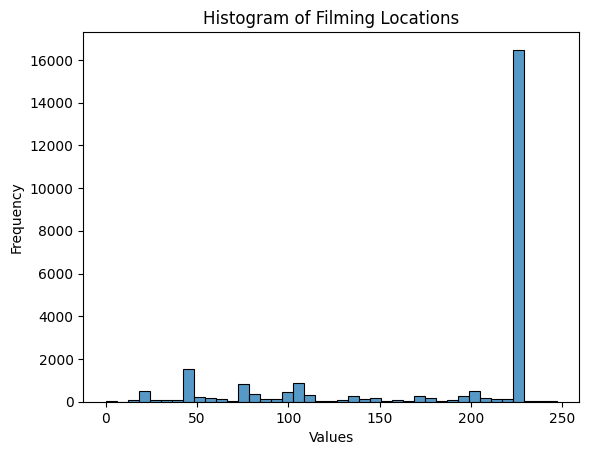

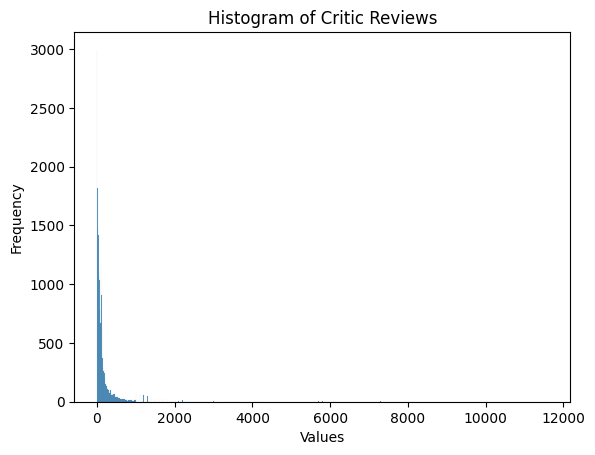

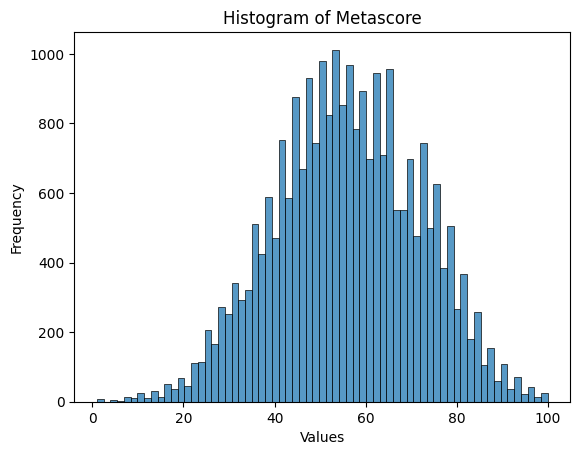

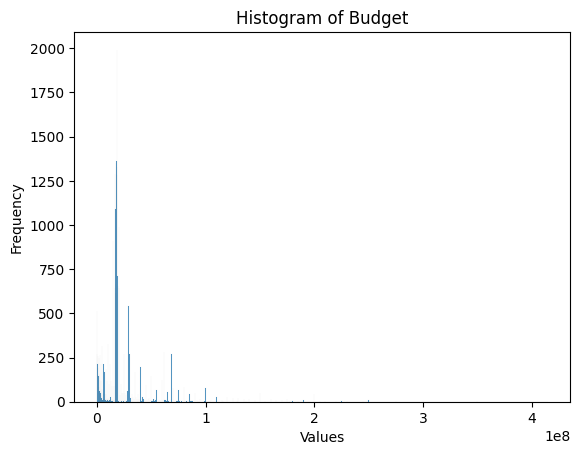

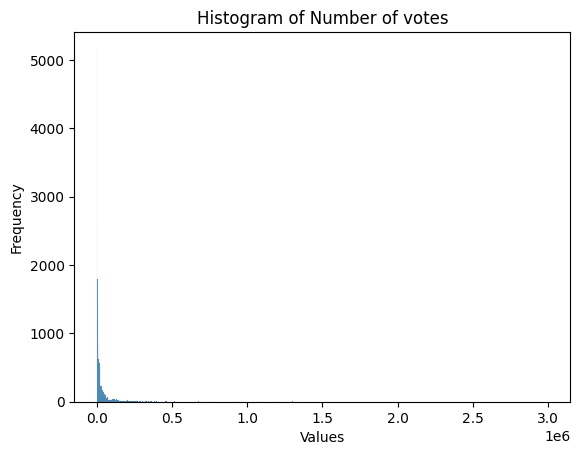

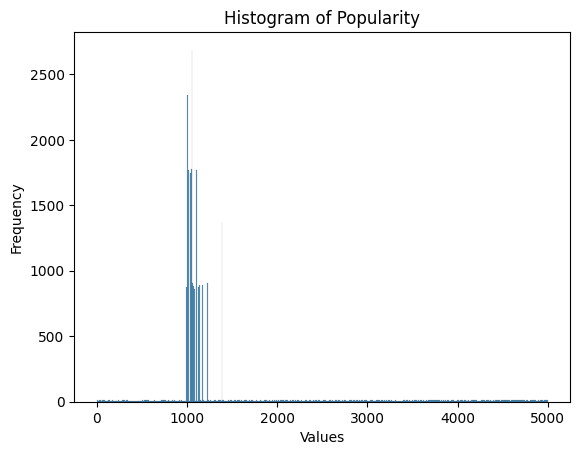

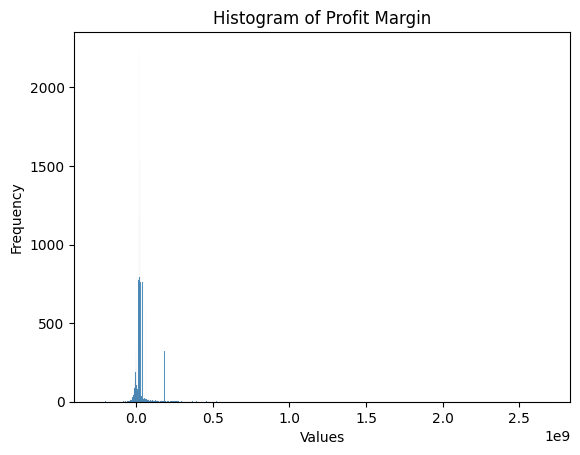

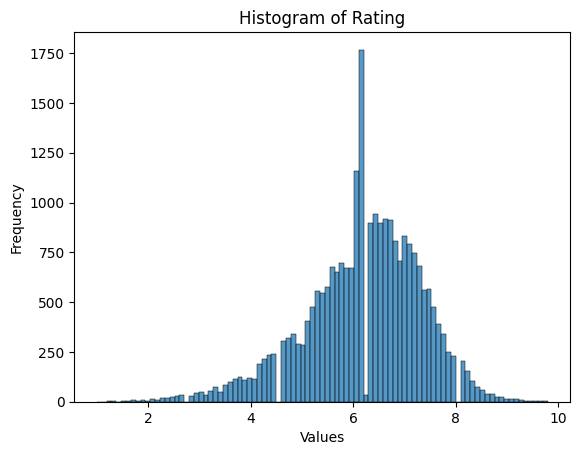

In [29]:
# Visualize
for col in data_selected.columns:
    sns.histplot(data_selected[col], kde=False)

    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}') 

    plt.show()

### Normalize:

In [30]:
data_normalized = data_selected.copy()

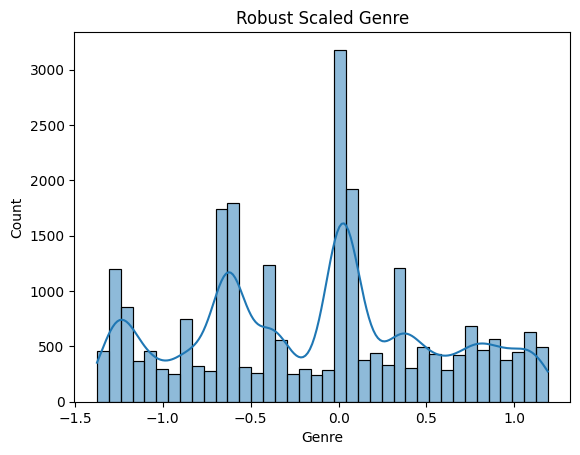

In [31]:
from sklearn.preprocessing import RobustScaler

scaler_genre = RobustScaler()
data_normalized['Genre'] = scaler_genre.fit_transform(data_selected[['Genre']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Genre'], kde=True)
plt.title('Robust Scaled Genre')
plt.show()

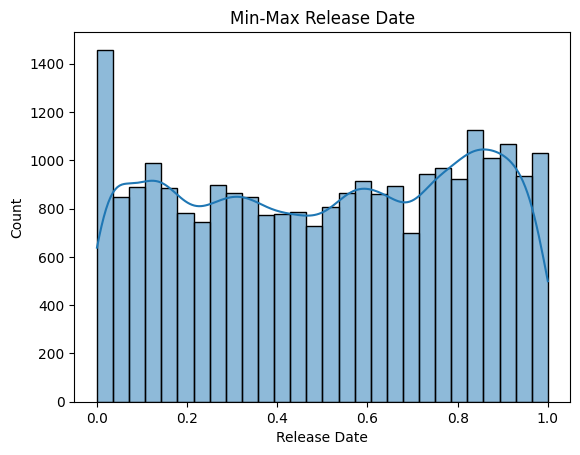

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler_time = MinMaxScaler()
data_normalized['Release Date'] = scaler_time.fit_transform(data_selected[['Release Date']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Release Date'], kde=True)
plt.title('Min-Max Release Date')
plt.show()

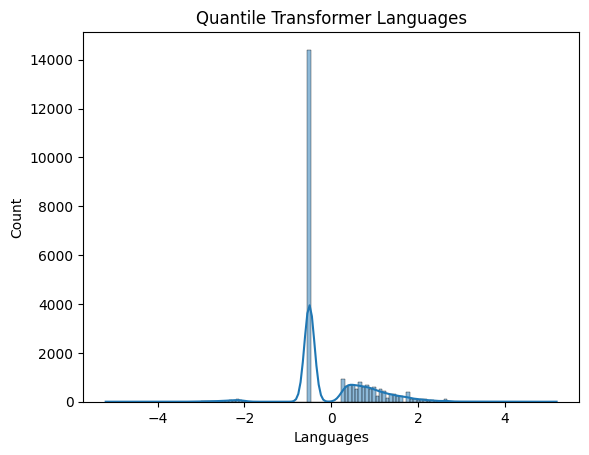

In [33]:
from sklearn.preprocessing import QuantileTransformer

trans_languages = QuantileTransformer(output_distribution='normal')
data_normalized['Languages'] = trans_languages.fit_transform(data_normalized[['Languages']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Languages'], kde=True)
plt.title('Quantile Transformer Languages')
plt.show()

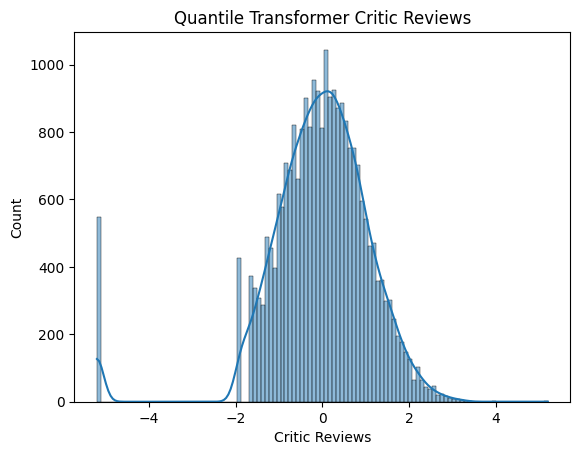

In [34]:
trans_critic = QuantileTransformer(output_distribution='normal')
data_normalized['Critic Reviews'] = trans_critic.fit_transform(data_normalized[['Critic Reviews']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Critic Reviews'], kde=True)
plt.title('Quantile Transformer Critic Reviews')
plt.show()

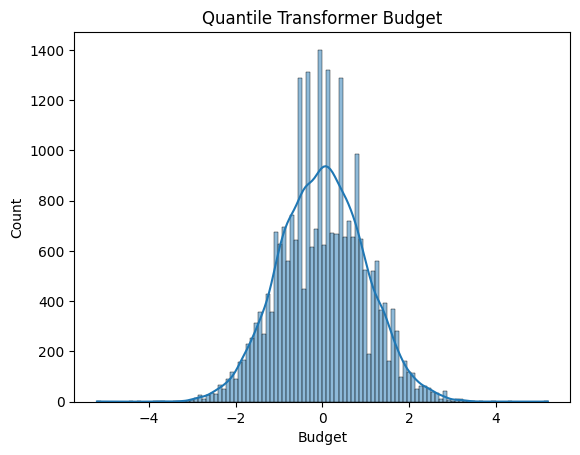

In [35]:
trans_budget = QuantileTransformer(output_distribution='normal')
data_normalized['Budget'] = trans_critic.fit_transform(data_normalized[['Budget']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Budget'], kde=True)
plt.title('Quantile Transformer Budget')
plt.show()

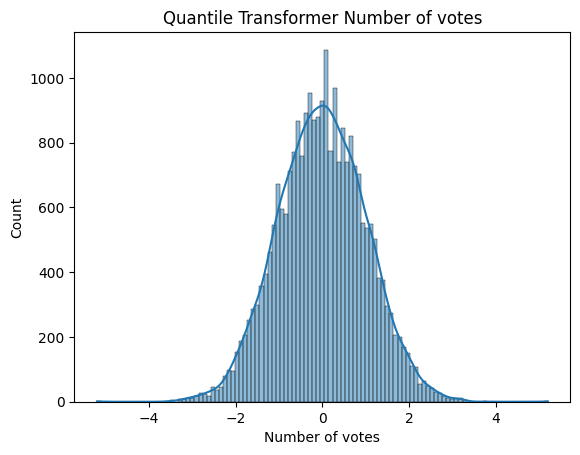

In [36]:
trans_votes = QuantileTransformer(output_distribution='normal')
data_normalized['Number of votes'] = trans_critic.fit_transform(data_normalized[['Number of votes']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Number of votes'], kde=True)
plt.title('Quantile Transformer Number of votes')
plt.show()

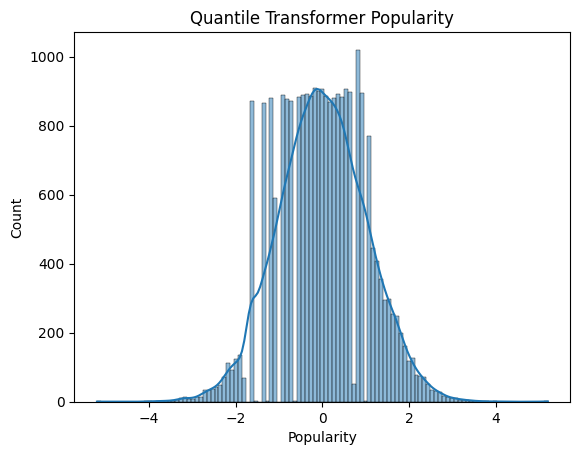

In [37]:
trans_popularity = QuantileTransformer(output_distribution='normal')
data_normalized['Popularity'] = trans_popularity.fit_transform(data_normalized[['Popularity']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Popularity'], kde=True)
plt.title('Quantile Transformer Popularity')
plt.show()

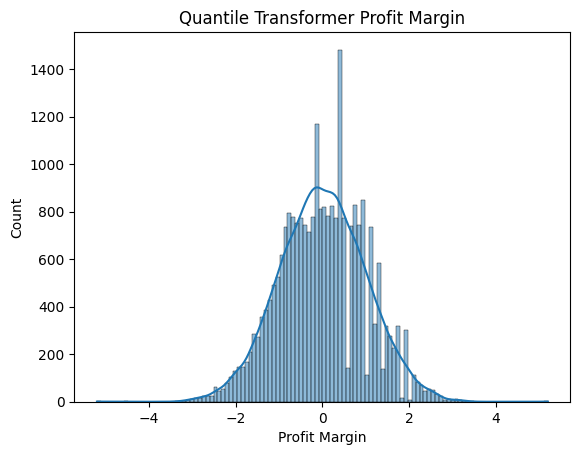

In [38]:
trans_profit = QuantileTransformer(output_distribution='normal')
data_normalized['Profit Margin'] = trans_popularity.fit_transform(data_normalized[['Profit Margin']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Profit Margin'], kde=True)
plt.title('Quantile Transformer Profit Margin')
plt.show()

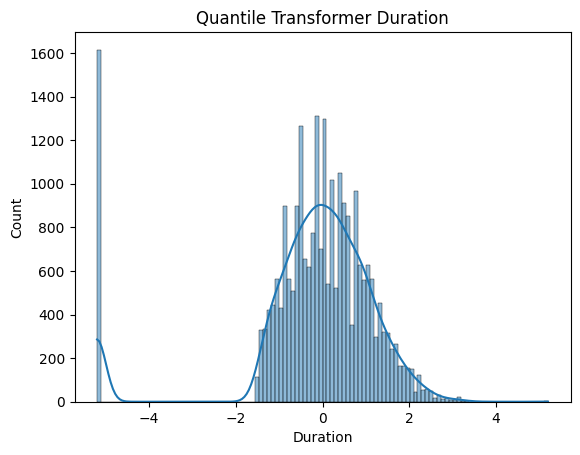

In [39]:
trans_duration = QuantileTransformer(output_distribution='normal')
data_normalized['Duration'] = trans_duration.fit_transform(data_normalized[['Duration']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Duration'], kde=True)
plt.title('Quantile Transformer Duration')
plt.show()

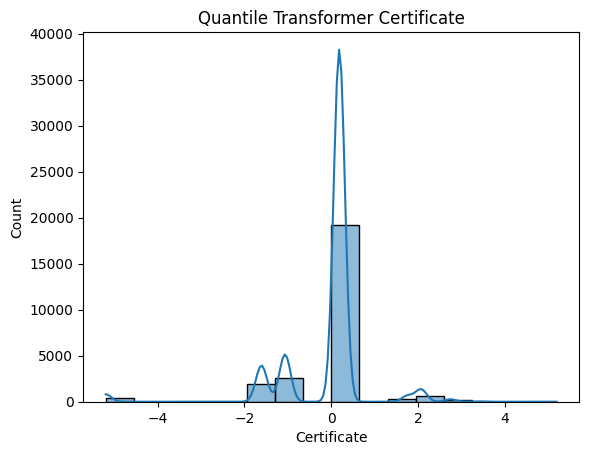

In [40]:
trans_cer = QuantileTransformer(output_distribution='normal')
data_normalized['Certificate'] = trans_cer.fit_transform(data_normalized[['Certificate']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Certificate'], kde=True)
plt.title('Quantile Transformer Certificate')
plt.show()

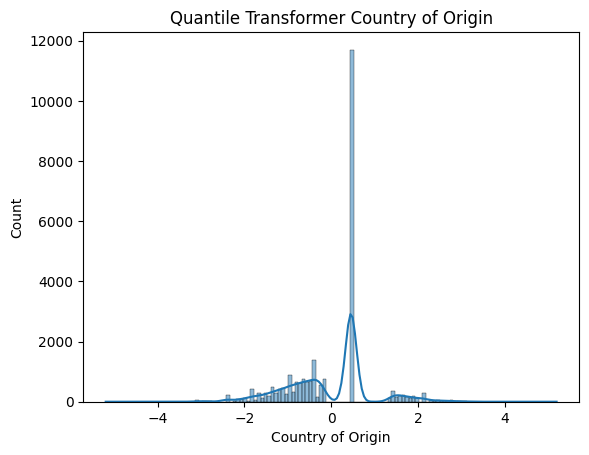

In [41]:
trans_CoO = QuantileTransformer(output_distribution='normal')
data_normalized['Country of Origin'] = trans_CoO.fit_transform(data_normalized[['Country of Origin']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Country of Origin'], kde=True)
plt.title('Quantile Transformer Country of Origin')
plt.show()

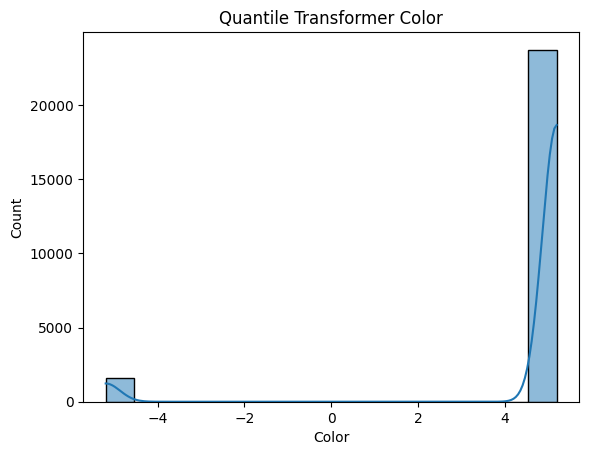

In [42]:
trans_color = QuantileTransformer(output_distribution='normal')
data_normalized['Color'] = trans_color.fit_transform(data_normalized[['Color']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Color'], kde=True)
plt.title('Quantile Transformer Color')
plt.show()

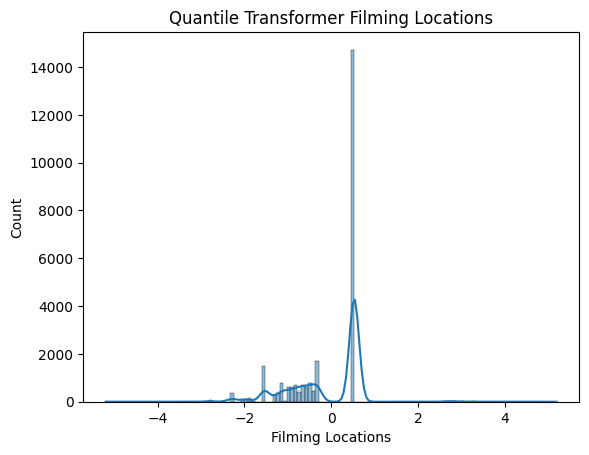

In [43]:
trans_FL = QuantileTransformer(output_distribution='normal')
data_normalized['Filming Locations'] = trans_FL.fit_transform(data_normalized[['Filming Locations']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Filming Locations'], kde=True)
plt.title('Quantile Transformer Filming Locations')
plt.show()

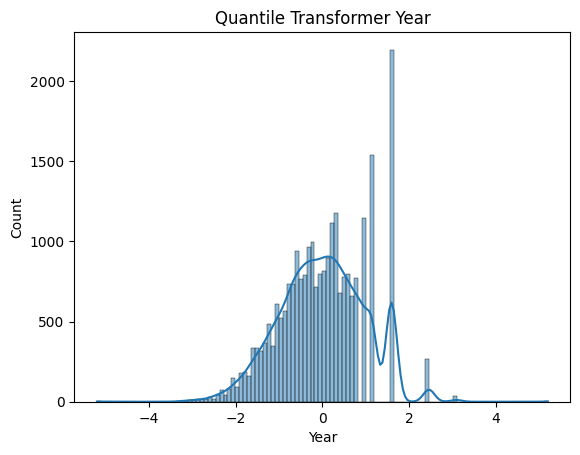

In [44]:
trans_year = QuantileTransformer(output_distribution='normal')
data_normalized['Year'] = trans_year.fit_transform(data_normalized[['Year']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Year'], kde=True)
plt.title('Quantile Transformer Year')
plt.show()

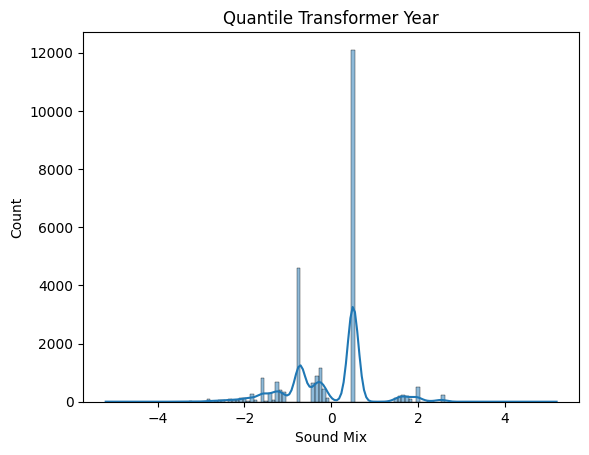

In [45]:
trans_soundmix = QuantileTransformer(output_distribution='normal')
data_normalized['Sound Mix'] = trans_soundmix.fit_transform(data_normalized[['Sound Mix']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Sound Mix'], kde=True)
plt.title('Quantile Transformer Year')
plt.show()

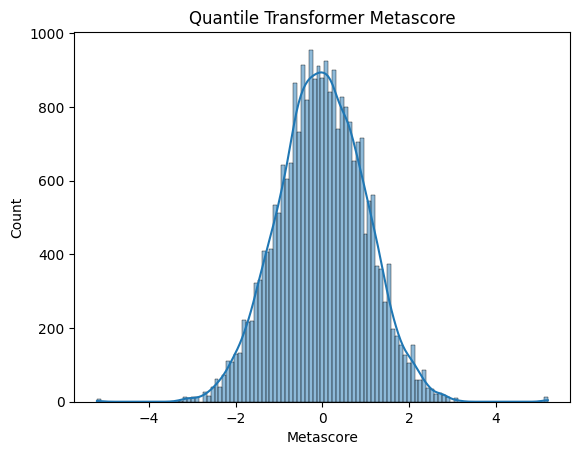

In [46]:
trans_metascore = QuantileTransformer(output_distribution='normal')
data_normalized['Metascore'] = trans_metascore.fit_transform(data_normalized[['Metascore']])

# Plot the distribution of the scaled data
sns.histplot(data_normalized['Metascore'], kde=True)
plt.title('Quantile Transformer Metascore')
plt.show()

In [47]:
# Save data milestone
data_normalized.to_csv('data_normalized.csv', index=False)

## EDA

In [48]:
data_selected['Year'].unique().sum()
column_data = data_selected['Year'].astype(str)

value_counts = column_data.str.split('|').explode().value_counts()

for genre, count in value_counts.items():
    print(f"{genre}: {count}")

2024.0: 2194
2023.0: 1536
2022.0: 1147
2019.0: 796
2018.0: 775
2021.0: 772
2017.0: 679
2020.0: 656
2016.0: 613
2014.0: 594
2015.0: 566
2013.0: 518
2012.0: 469
2011.0: 427
2009.0: 419
2008.0: 410
2010.0: 394
2007.0: 386
2006.0: 382
2005.0: 332
2004.0: 323
2001.0: 298
2002.0: 295
2003.0: 283
2000.0: 274
1987.0: 269
1988.0: 269
2025.0: 267
1997.0: 265
1994.0: 262
1999.0: 258
1998.0: 257
1996.0: 253
1995.0: 248
1993.0: 246
1986.0: 242
1989.0: 237
1990.0: 228
1991.0: 227
1985.0: 222
1992.0: 205
1984.0: 204
1983.0: 188
1981.0: 188
1980.0: 185
1974.0: 178
1982.0: 176
1972.0: 173
1973.0: 168
1977.0: 165
1971.0: 162
1978.0: 153
1979.0: 151
1976.0: 149
1970.0: 148
1975.0: 139
1969.0: 130
1968.0: 126
1967.0: 112
1966.0: 109
1964.0: 108
1965.0: 99
1963.0: 90
1954.0: 88
1958.0: 87
1957.0: 86
1959.0: 84
1960.0: 83
1962.0: 82
1961.0: 81
1956.0: 76
1955.0: 75
1953.0: 65
1950.0: 62
1951.0: 62
1948.0: 60
1949.0: 57
1952.0: 57
1946.0: 55
2002.4517203107653: 44
1939.0: 43
2001.1659340659344: 41
2000.75690

In [49]:
average_difference = (abs(data_selected['Critic Reviews']/max(data_selected['Critic Reviews']*10) - data_selected['Rating'])).mean()
print(f"Average Difference: {average_difference}")

Average Difference: 6.193176544988177


Inertia for k=1: 406085540688169336832.00
Inertia for k=2: 187626146891355160576.00
Inertia for k=3: 106499043723461427200.00
Inertia for k=4: 74926544762492551168.00
Inertia for k=5: 56492407107181764608.00
Inertia for k=6: 49198972702586576896.00
Inertia for k=7: 40197768789062877184.00
Inertia for k=8: 33843995961530884096.00
Inertia for k=9: 29957320861271330816.00
Inertia for k=10: 26537401958149869568.00


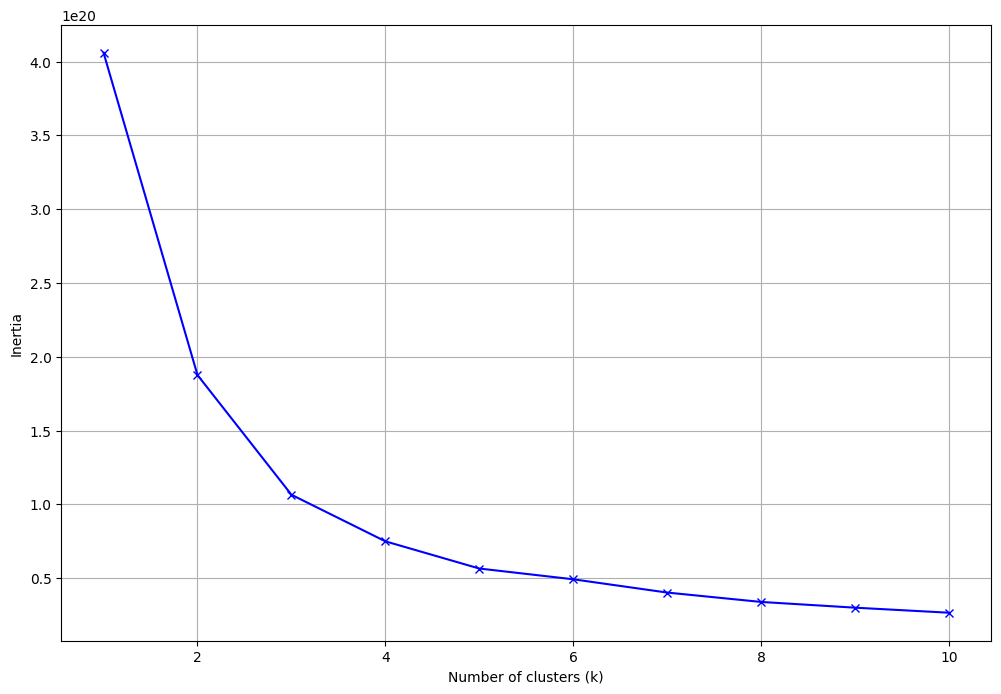

In [50]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_drop_unneeded_encoded)

    inertia.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_:.2f}")

# Display the plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertia, marker='x', linestyle='-', color='b')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_33284\1264725465.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Genre_Cluster'] = genres_pca_df['Cluster']


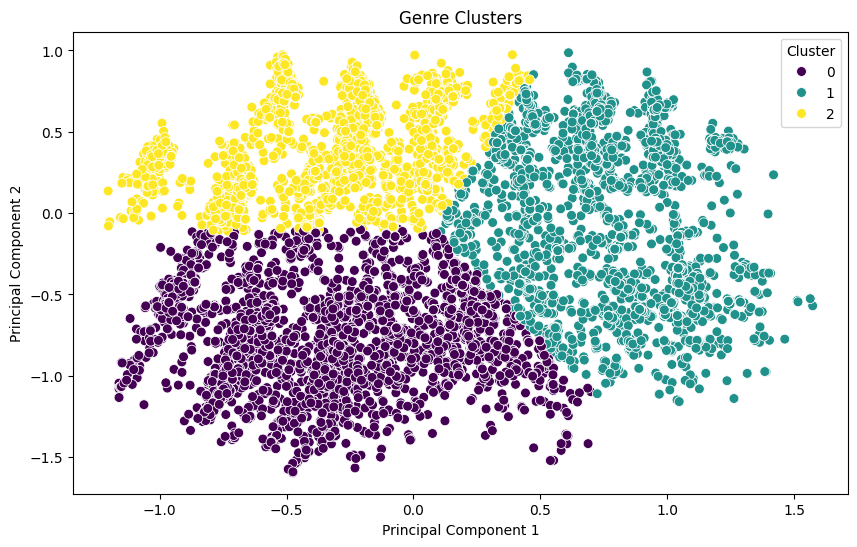


Cluster 0 Genres:
2     Superhero|Action|Adventure|Fantasy|Romance|Sci-Fi
3                                         Action|Comedy
4     Desert Adventure|Globetrotting Adventure|Actio...
10             Dark Comedy|Parody|Comedy|Crime|Thriller
11    Martial Arts|Superhero|Action|Adventure|Drama|...
13                                  Farce|Satire|Comedy
18          Quirky Comedy|Slapstick|Comedy|Family|Sport
21                      Football|Slapstick|Comedy|Sport
25                      Slapstick|Comedy|Romance|Sci-Fi
27               Pop Musical|Teen Comedy|Comedy|Musical
Name: Genre, dtype: object

Cluster 1 Genres:
5           Supernatural Horror|Horror|Mystery|Thriller
6           Supernatural Horror|Horror|Mystery|Thriller
8     Dark Comedy|Slasher Horror|Suspense Mystery|Te...
14           Serial Killer|Crime|Drama|Mystery|Thriller
15            Political Thriller|Tragedy|Drama|Thriller
20    Historical Epic|Political Drama|Biography|Dram...
23    Supernatural Horror|Witch Horror|

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer

genres_split = data_filtered['Genre'].str.split('|')

# One-Hot Encode the genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(genres_split)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
genres_pca = pca.fit_transform(genres_encoded)

# Convert to DataFrame for easier handling
genres_pca_df = pd.DataFrame(genres_pca, columns=['PC1', 'PC2'])

# Perform K-Means Clustering
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
genres_pca_df['Cluster'] = kmeans.fit_predict(genres_pca)

# Add cluster labels to the original data
data_filtered['Genre_Cluster'] = genres_pca_df['Cluster']

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=genres_pca_df, palette='viridis', s=50
)
plt.title('Genre Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Inspect the clusters
for cluster_id in range(n_clusters):
    cluster_genres = data_filtered[data_filtered['Genre_Cluster'] == cluster_id]['Genre']
    print(f"\nCluster {cluster_id} Genres:")
    print(cluster_genres.head(10))  # Show the first 10 genres in each cluster

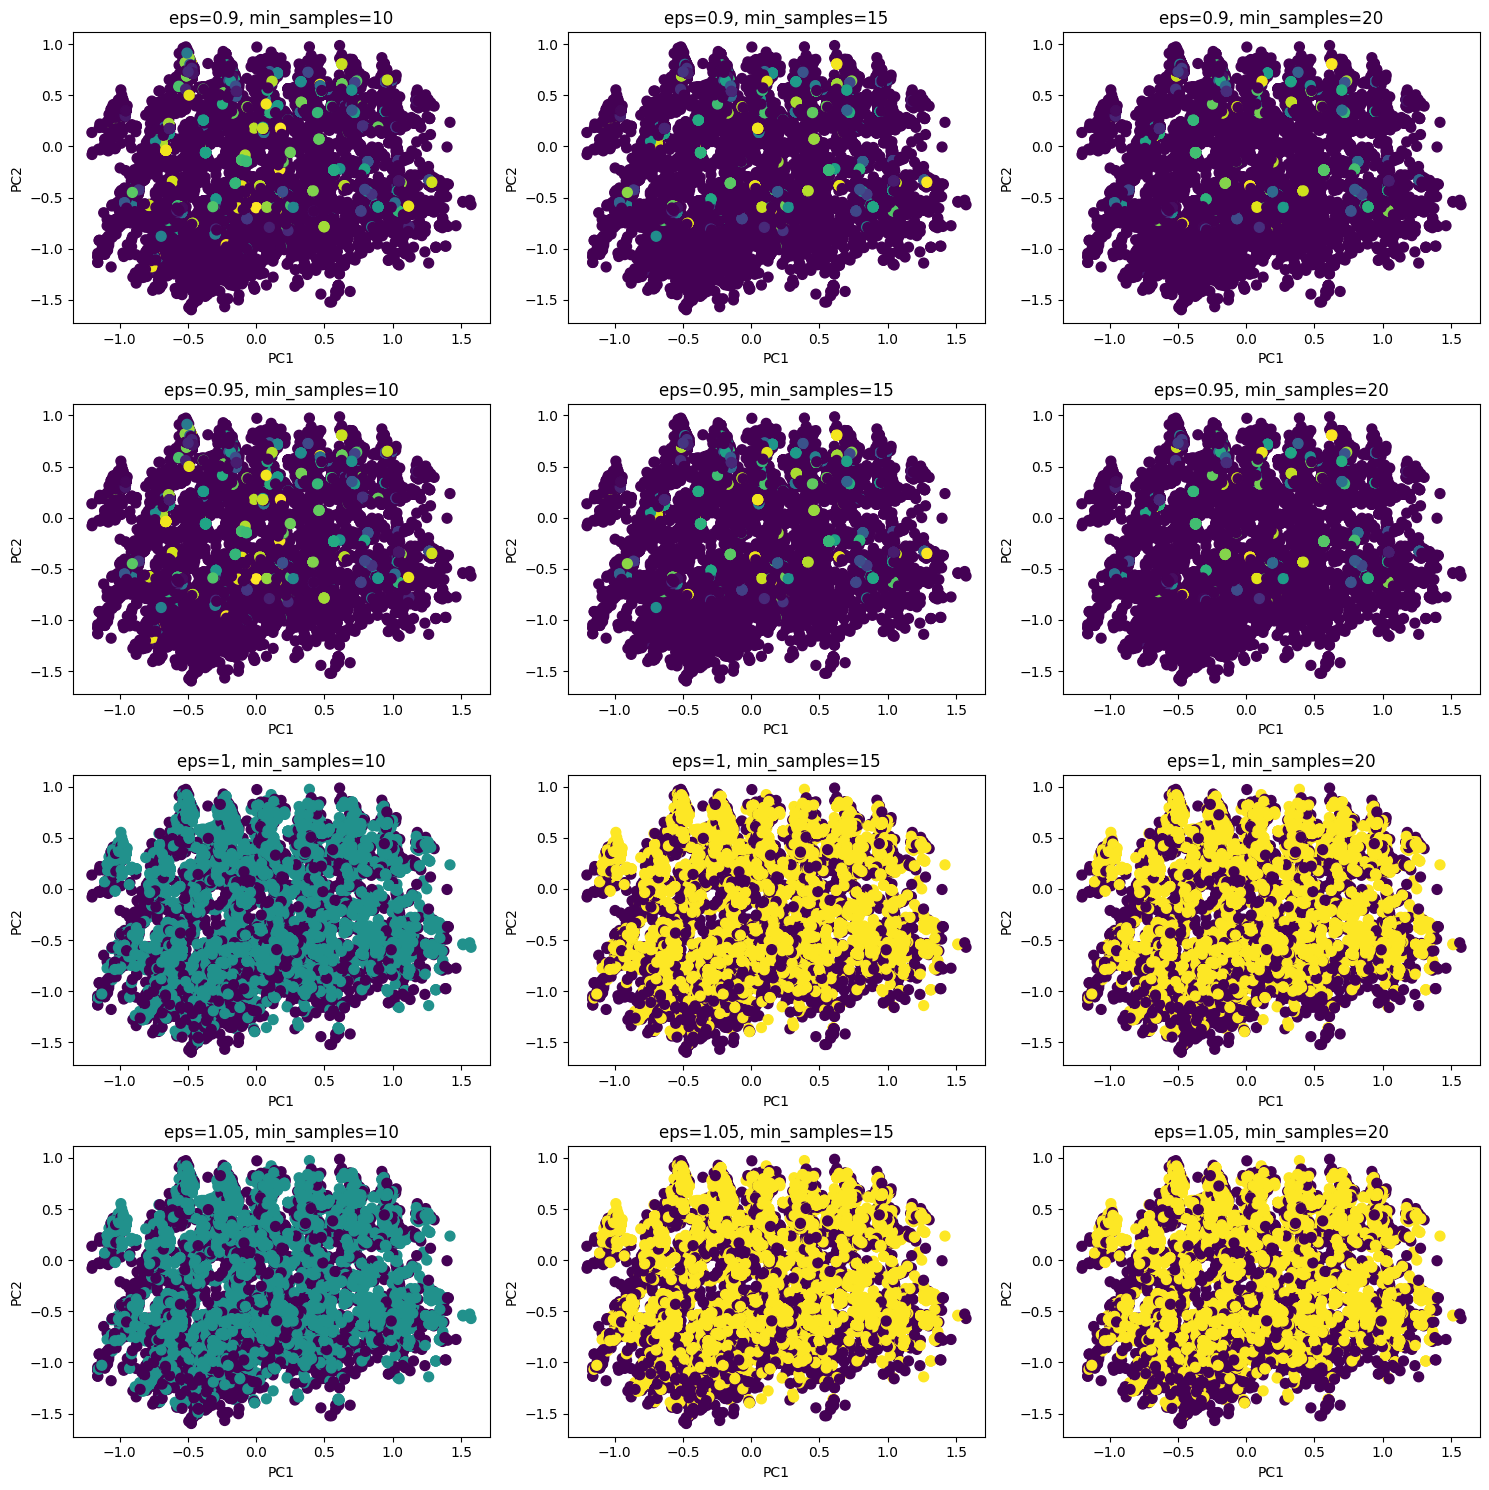

In [52]:
from sklearn.cluster import DBSCAN
eps_values = [0.9, 0.95, 1, 1.05]
min_samples_values = [10, 15, 20]

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
genres_pca = pca.fit_transform(genres_encoded)

# Set up the subplot grid
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

# Iterate over combinations of eps and min_samples
for row, eps in enumerate(eps_values):
    for col, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN with the current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(genres_encoded)

        # Plot the clusters
        ax = axes[row, col]
        scatter = ax.scatter(genres_pca[:, 0], genres_pca[:, 1], c=labels, cmap='viridis', s=50)
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()